In [1]:
import io
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import operator
import math
import timeit
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Removing the unnecessary column

In [3]:
data.drop('Id',axis=1,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['Species'] = data['Species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
train, test = train_test_split(data, test_size=0.33, random_state=42) 
test.index = np.arange(0, len(test))

In [13]:
def euclideanDistance(data1, data2, features):
    distance = 0
   # print(data1)
    for x in range(features):
        #print("Operand:",data1[x],", ",data2[x])
        #print(x)
        #print(data1[x], data2[x])
        distance += pow((data1[x] - data2[x]), 2)
    return math.sqrt(distance)

In [14]:
def getNeighbors(trainingSet, testInstance, k, features):
    distances = []
    #Make this length a list of the feature indexes which we want to use
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        train=(trainingSet.iloc[x].tolist())
        dist = euclideanDistance(testInstance, train, features)
        distances.append((train, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [15]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [16]:
#Calculate accuracy of predictions
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        test=(testSet.iloc[x].tolist())
        if test[-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [17]:
def KNN_predict(trainingSet, testSet, k, features):
    predictions=[]
    #print(len(testSet))
    for x in range(len(testSet)):
        test=(testSet.iloc[x].tolist())
        neighbors = getNeighbors(trainingSet, test, k, features)
        result = getResponse(neighbors)
        predictions.append(result)
    accuracy = getAccuracy(testSet, predictions)

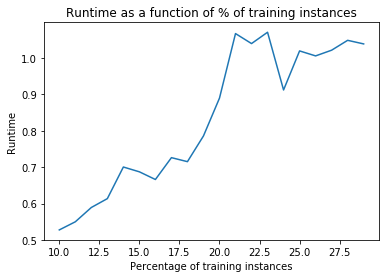

In [19]:
if __name__ == '__main__':
    x_axis1=[]
    y_axis1=[]
    k = 3
    feature_length1=len(test.columns)-1
    #print(feature_length1)
    for split in range(10,30):
        train1=[]
        test1=[]
        train_1, test_1 = train_test_split(data, test_size=split/100, random_state=42) 
        #print(train_1,test_1)
        test_1.index = np.arange(0, len(test_1))
        #print(len(test_1))
        x_axis1.append(split)
        y_axis1.append(timeit.Timer("KNN_predict(train_1, test_1, k, feature_length1)", "from __main__ import KNN_predict, train_1, test_1, k, feature_length1").timeit(number=1))
    plt.plot(x_axis1, y_axis1)
    plt.xlabel('Training instances')
    plt.ylabel('Runtime')
    plt.title('Runtime as a function of percentage of training instances')
    plt.show()
   